In [1]:
from blg_strain.classes import *
from blg_strain.microscopic import feq_func

import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [7]:
bs1 = BandStructure(xi=1, delta=0.01, Delta=0.01, twobytwo=False)
bs2 = BandStructure(xi=-1, delta=0.01, Delta=0.01, twobytwo=False)

In [8]:
bs1.calculate(200, 200)
bs2.calculate(200, 200)

<IPython.core.display.Javascript object>


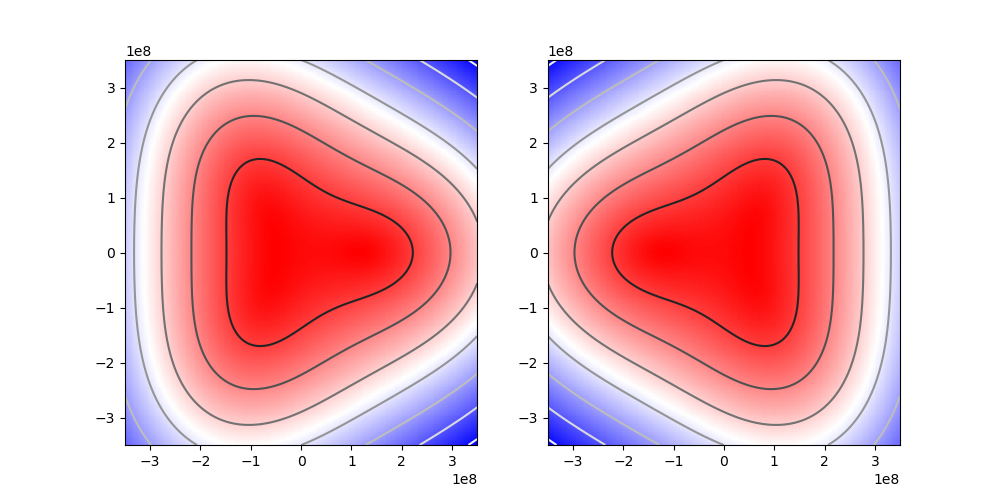

In [9]:
n=1

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].pcolormesh(bs1.Kx, bs1.Ky, bs1.E[n], cmap='bwr')
ax[0].contour(bs1.Kx, bs1.Ky, bs1.E[n], cmap='Greys')
ax[1].pcolormesh(bs2.Kx, bs2.Ky, bs2.E[n], cmap='bwr')
ax[1].contour(bs2.Kx, bs2.Ky, bs2.E[n], cmap='Greys')

<IPython.core.display.Javascript object>


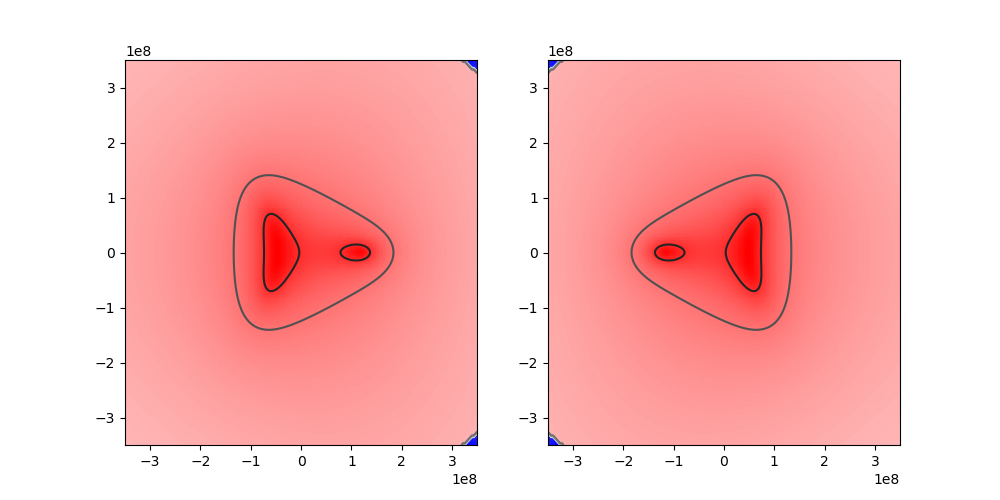

In [10]:
n=1
m=0

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].pcolormesh(bs1._Kx, bs1._Ky, bs1._Psi[n,m].real, cmap='bwr')
ax[0].contour(bs1._Kx, bs1._Ky, bs1._Psi[n,m].real, cmap='Greys')
ax[1].pcolormesh(bs2._Kx, bs2._Ky, bs2._Psi[n,m].real, cmap='bwr')
ax[1].contour(bs2._Kx, bs2._Ky, bs2._Psi[n,m].real, cmap='Greys')

<IPython.core.display.Javascript object>


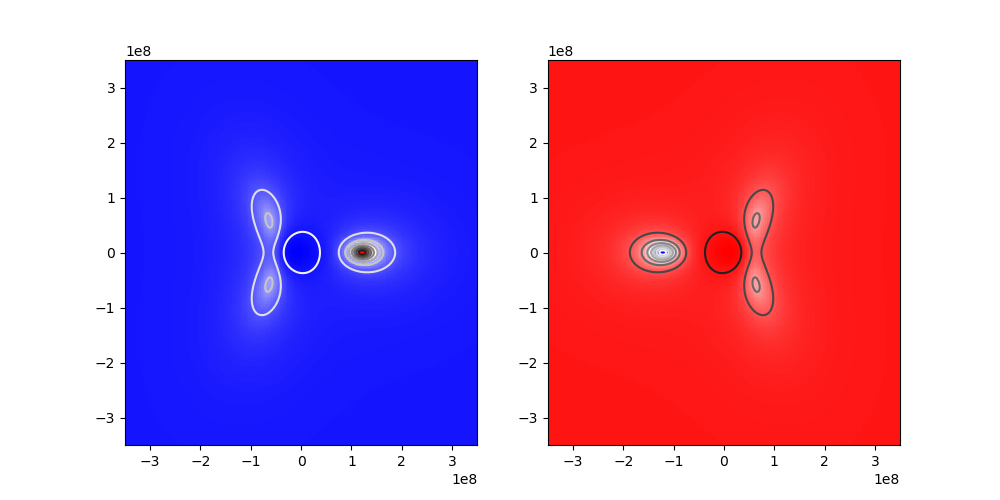

In [11]:
n = 1

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].pcolormesh(bs1.Kx, bs1.Ky, bs1.Mu[n], cmap='bwr')
ax[0].contour(bs1.Kx, bs1.Ky, bs1.Mu[n], cmap='Greys')
ax[1].pcolormesh(bs2.Kx, bs2.Ky, bs2.Mu[n], cmap='bwr')
ax[1].contour(bs2.Kx, bs2.Ky, bs2.Mu[n], cmap='Greys')

In [25]:
from blg_strain.macroscopic import _M_bands
from blg_strain.microscopic import feq_func

In [26]:
EF = 0.06
T = 0

f = feq_func(bs1.E, EF, T)
M1 = _M_bands(bs1.kx, bs1.ky, f, bs1.splE, bs1.splO, bs1.splM, tau=.1, EF=EF)

f = feq_func(bs2.E, EF, T)
M2 = _M_bands(bs2.kx, bs2.ky, f, bs2.splE, bs2.splO, bs2.splM, tau=.1, EF=EF)

M1, M2

(array([1.55120842e-22, 7.85267233e-36]),
 array([ 1.55120842e-22, -2.93011353e-35]))

In [9]:
from blg_strain.hamiltonian import *

In [10]:
H2 = H_2by2(bs1._Kx, bs1._Ky, xi=1, Delta=0.01, delta=0.01)
H2x = H2_dkx(bs1._Kx, bs1._Ky, xi=1)
H2y = H2_dky(bs1._Kx, bs1._Ky, xi=1)

In [14]:
i, j= 50,50
H2ygrad = np.gradient(H2, bs1._ky, axis=-2)
H2ygrad[:,:,i,j], H2y[:,:,i,j]

(array([[-1.03397577e-25+0.0000000e+00j,  4.95466665e-10-4.1451061e-10j],
        [ 4.95466665e-10+4.1451061e-10j,  1.03397577e-25+0.0000000e+00j]]),
 array([[-0.0000000e+00+0.00000000e+00j, -4.1451061e-10-3.33554556e-10j],
        [-4.1451061e-10+3.33554556e-10j, -0.0000000e+00+0.00000000e+00j]]))

In [15]:
H2xgrad = np.gradient(H2, bs1._kx, axis=-2)
H2xgrad[:,:,i,j], H2x[:,:,i,j]

(array([[-1.03397577e-25+0.0000000e+00j,  4.95466665e-10-4.1451061e-10j],
        [ 4.95466665e-10+4.1451061e-10j,  1.03397577e-25+0.0000000e+00j]]),
 array([[-0.00000000e+00+0.0000000e+00j,  4.95466665e-10-4.1451061e-10j],
        [ 4.95466665e-10+4.1451061e-10j, -0.00000000e+00+0.0000000e+00j]]))

In [17]:
np.allclose(H2ygrad, H2y), np.allclose(H2xgrad, H2x)

(True, True)

<IPython.core.display.Javascript object>


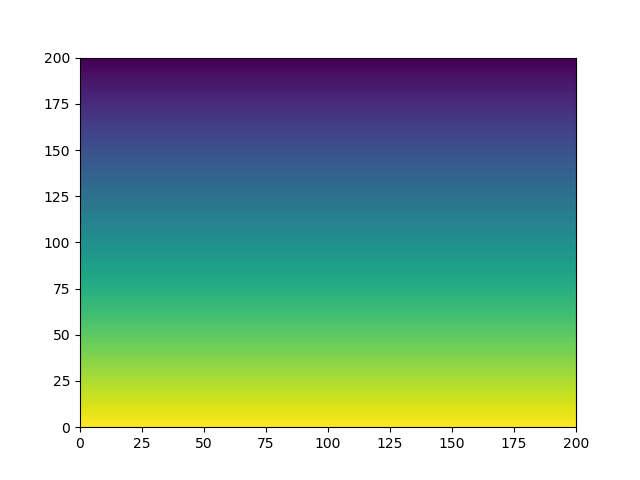

In [34]:
fig, ax = plt.subplots()
# ax.pcolormesh(H2[0,1,:,:].real)
# ax.pcolormesh(np.gradient(H2, bs1._kx, axis=-2)[0,1,:,:].real)
ax.pcolormesh(H2x[0,1,:,:].real)